In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Netflix_User_Behavior_Dataset.csv")  # make sure the file is uploaded
df.head()


,User_ID,Title,Genre,Date_Watched,Time_Spent,Device,Subscription,Country,Rating,Completion_Status
0,U0001,Stranger Things,Action,2024-03-09,26,Mobile,Premium,Australia,1,Partial
1,U0002,Narcos,Thriller,2024-01-04,126,Smart TV,Standard,India,3,Dropped
2,U0003,Breaking Bad,Romance,2024-05-04,176,Laptop,Premium,USA,5,Partial
3,U0004,The Crown,Thriller,2024-06-04,94,Mobile,Basic,India,5,Completed
4,U0005,The Crown,Thriller,2024-03-12,50,Mobile,Basic,USA,5,Dropped


In [2]:
# Dataset shape and columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Basic stats
df.describe()

# Data types and nulls
df.info()
print("\nMissing Values:\n", df.isnull().sum())


Shape: (500, 10)

Columns:
 Index(['User_ID', 'Title', 'Genre', 'Date_Watched', 'Time_Spent', 'Device',
       'Subscription', 'Country', 'Rating', 'Completion_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User_ID            500 non-null    object
 1   Title              500 non-null    object
 2   Genre              500 non-null    object
 3   Date_Watched       500 non-null    object
 4   Time_Spent         500 non-null    int64 
 5   Device             500 non-null    object
 6   Subscription       500 non-null    object
 7   Country            500 non-null    object
 8   Rating             500 non-null    int64 
 9   Completion_Status  500 non-null    object
dtypes: int64(2), object(8)
memory usage: 39.2+ KB

Missing Values:
 User_ID              0
Title                0
Genre                0
D

In [3]:
# Convert date column
df['Date_Watched'] = pd.to_datetime(df['Date_Watched'])

# Extract new features
df['Watch_Hour'] = df['Date_Watched'].dt.hour
df['Watch_Day'] = df['Date_Watched'].dt.day_name()
df['Month'] = df['Date_Watched'].dt.month_name()

# Binge-watching if Time_Spent >= 90 mins
df['Binge_Watching'] = df['Time_Spent'].apply(lambda x: 'Binge' if x >= 90 else 'Normal')


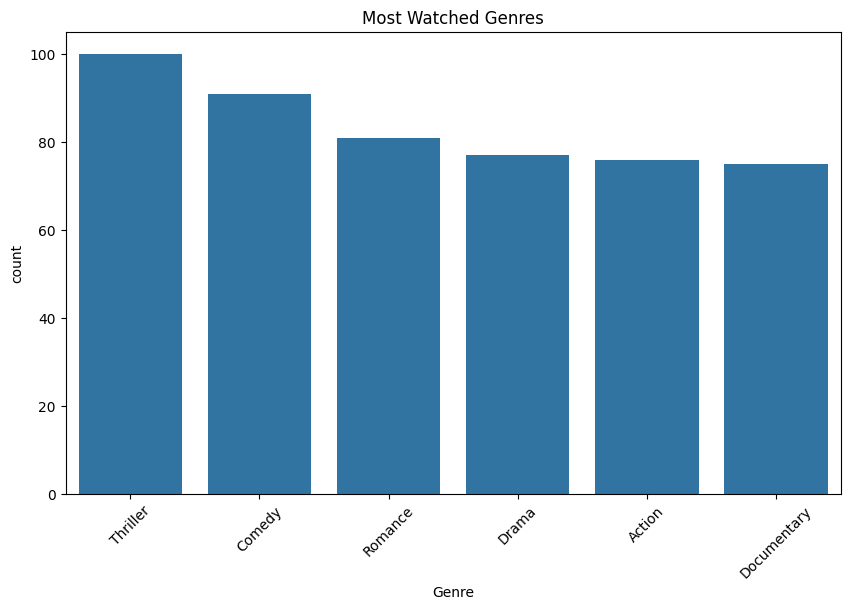

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title("Most Watched Genres")
plt.xticks(rotation=45)
plt.show()


In [12]:
top_titles_country = df.groupby(['Country', 'Title']).size().reset_index(name='Watch_Count')
top_titles_country = top_titles_country.sort_values(['Country', 'Watch_Count'], ascending=[True, False])
top_titles_country = top_titles_country.groupby('Country').head(5)
print(top_titles_country)


      Country            Title  Watch_Count
1   Australia          Friends           20
4   Australia  Stranger Things           20
2   Australia      Money Heist           16
5   Australia        The Crown           15
0   Australia     Breaking Bad           13
9      Canada           Narcos           21
6      Canada     Breaking Bad           20
7      Canada          Friends           20
8      Canada      Money Heist           18
10     Canada  Stranger Things           13
16      India  Stranger Things           22
14      India      Money Heist           20
15      India           Narcos           19
17      India        The Crown           16
13      India          Friends           14
20         UK      Money Heist           25
23         UK        The Crown           18
18         UK     Breaking Bad           17
19         UK          Friends           17
21         UK           Narcos           14
29        USA        The Crown           21
24        USA     Breaking Bad  

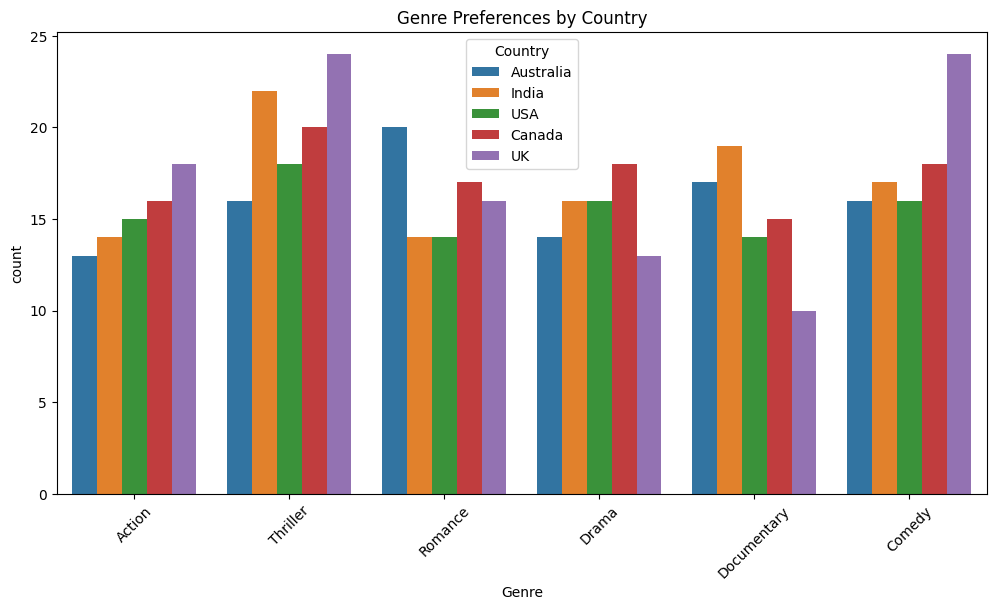

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', hue='Country')
plt.title("Genre Preferences by Country")
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


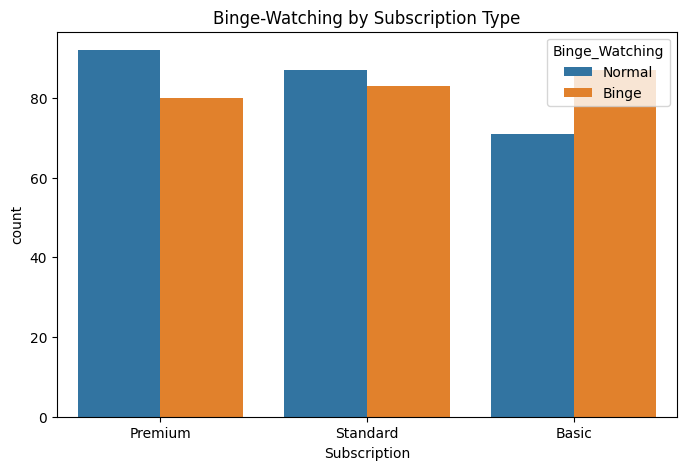

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Subscription', hue='Binge_Watching')
plt.title("Binge-Watching by Subscription Type")
plt.show()


In [15]:
avg_rating_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print("Average Rating by Genre:\n", avg_rating_genre)


Average Rating by Genre:
 Genre
Thriller       3.300000
Action         3.039474
Drama          3.038961
Romance        3.037037
Comedy         3.000000
Documentary    2.973333
Name: Rating, dtype: float64


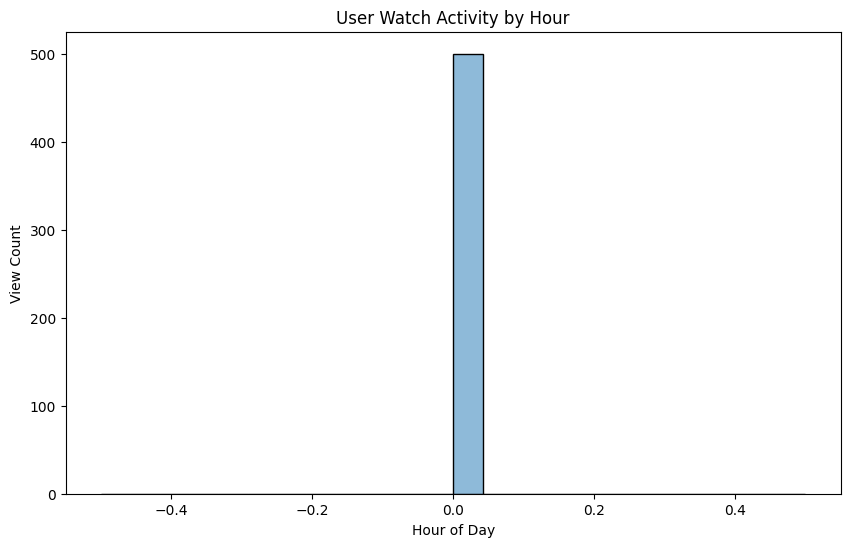

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['Watch_Hour'], bins=24, kde=True)
plt.title("User Watch Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("View Count")
plt.show()


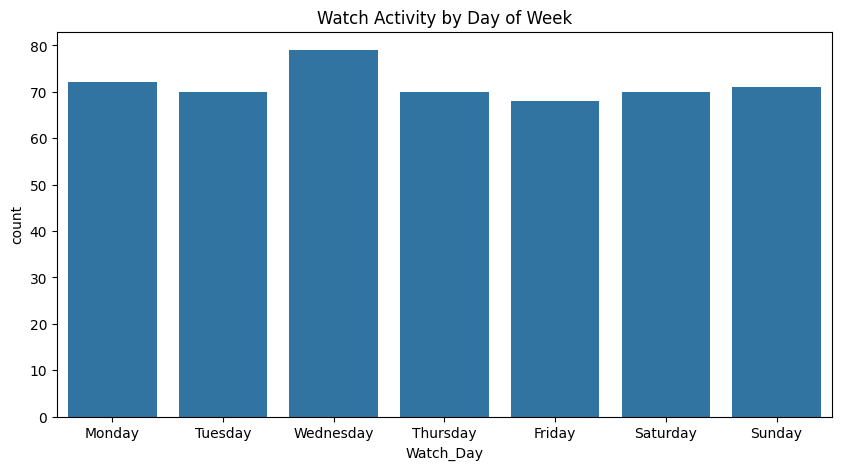

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Watch_Day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Watch Activity by Day of Week")
plt.show()


Completion Status Percentage:
 Completion_Status
Dropped      35.0
Partial      33.4
Completed    31.6
Name: proportion, dtype: float64


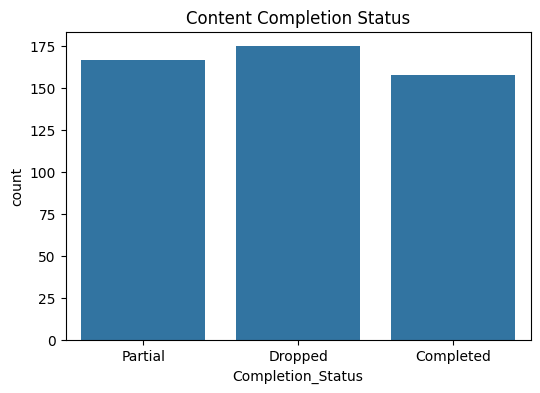

In [16]:
completion_counts = df['Completion_Status'].value_counts(normalize=True) * 100
print("Completion Status Percentage:\n", completion_counts)

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Completion_Status')
plt.title("Content Completion Status")
plt.show()


In [17]:
top_users = df.groupby('User_ID')['Time_Spent'].sum().sort_values(ascending=False).head(5)
print("Top 5 Most Loyal Users (by Watch Time):\n", top_users)


Top 5 Most Loyal Users (by Watch Time):
 User_ID
U0084    180
U0419    180
U0079    180
U0150    180
U0487    179
Name: Time_Spent, dtype: int64


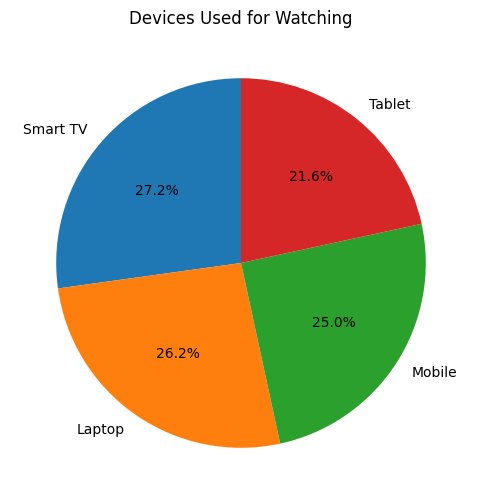

In [7]:
plt.figure(figsize=(6,6))
df['Device'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Devices Used for Watching")
plt.ylabel("")
plt.show()


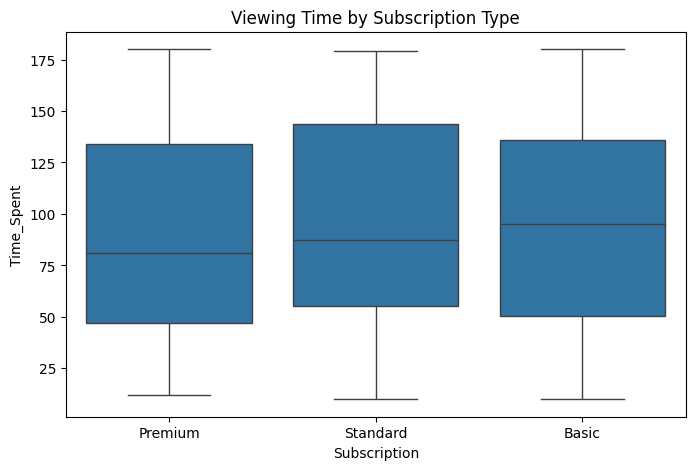

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Subscription', y='Time_Spent')
plt.title("Viewing Time by Subscription Type")
plt.show()


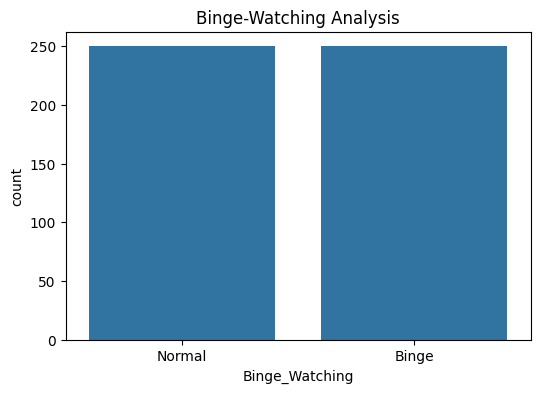

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Binge_Watching')
plt.title("Binge-Watching Analysis")
plt.show()


In [10]:
print("Top Genres:\n", df['Genre'].value_counts().head())

print("\nTop Titles by Watch Count:\n", df['Title'].value_counts().head())

avg_watch_by_genre = df.groupby('Genre')['Time_Spent'].mean().sort_values(ascending=False)
print("\nAverage Watch Time by Genre:\n", avg_watch_by_genre)

binge_percent = df['Binge_Watching'].value_counts(normalize=True) * 100
print("\nBinge vs Normal Viewing Percentage:\n", binge_percent)


Top Genres:
 Genre
Thriller    100
Comedy       91
Romance      81
Drama        77
Action       76
Name: count, dtype: int64

Top Titles by Watch Count:
 Title
Money Heist        94
Narcos             82
Friends            82
The Crown          82
Stranger Things    80
Name: count, dtype: int64

Average Watch Time by Genre:
 Genre
Romance        106.938272
Comedy          98.098901
Action          93.644737
Drama           89.636364
Documentary     85.493333
Thriller        83.890000
Name: Time_Spent, dtype: float64

Binge vs Normal Viewing Percentage:
 Binge_Watching
Normal    50.0
Binge     50.0
Name: proportion, dtype: float64


In [20]:
def recommend_shows(genre):
    return df[df['Genre'] == genre]['Title'].value_counts().head(3)

print("🎯 Recommended Action Shows:\n", recommend_shows("Action"))


🎯 Recommended Action Shows:
 Title
Breaking Bad       18
Stranger Things    16
Money Heist        13
Name: count, dtype: int64


In [11]:
df.to_csv("Cleaned_Netflix_Behavior.csv", index=False)
